**Cleaning data**

We show two data sets.

In the first one, to estimate the economy activity we'll be using the **State Quarterly Indicator of Economic Activity (ITAEE by its Spanish acronym)** *Indicador Trimestral de la Actividad Económica Estatal* produced by INEGI. We develop the generalized diffusion index for the Mexican economy using state economic coincident indexes. 

In the second one, we'll be using a database that shows a list of the **measures that the Government of Mexico City** and Mayor's Offices have implemented to address the health contingency of COVID-19.

**Exploring ITAEE data**

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
# File to Load (Remember to Change These)
file_to_load = "Resources/conjunto_de_datos_itaee_itaee_0202020_t4.csv"

# Read Purchasing File and store into Pandas data frame
itaee_data = pd.read_csv(file_to_load)
itaee_data.head()


,Descriptores,2003|T1,2003|T2,2003|T3,2003|T4,2003|Anual,2004|T1,2004|T2,2004|T3,2004|T4,...,2019|T1,2019|T2,2019|T3,2019|T4,2019|Anual,2020|T1<R>,2020|T2<R>,2020|T3<R>,2020|T4<P>,2020|Anual
0,Índice de volumen físico base 2013=100|Total,77.503956,83.416880,76.811752,81.440841,79.793357,79.984200,86.779487,80.300091,86.178942,...,112.923740,115.252267,116.813835,124.816904,117.451687,111.270259,96.733689,103.686066,114.045403,106.433854
1,Índice de volumen físico base 2013=100|Activid...,108.140544,129.946779,136.743335,131.581676,126.603083,92.034139,145.707737,107.641831,110.949912,...,66.215335,118.774439,113.766654,114.620901,103.344332,68.024463,121.476781,120.277480,106.849620,104.157086
2,Índice de volumen físico base 2013=100|Activid...,95.729909,97.763263,101.331206,101.862423,99.171700,96.155207,99.010923,107.112578,107.918355,...,99.814865,97.246303,102.025838,107.609435,101.674110,98.542354,70.652840,84.817679,98.313456,88.081583
3,Índice de volumen físico base 2013=100|Activid...,111.214383,119.095754,112.281942,132.428817,118.755224,108.393536,117.238413,123.168200,120.259932,...,103.405632,106.515984,109.689338,128.401767,112.003180,111.892557,90.493663,110.004400,153.099161,116.372445
4,Índice de volumen físico base 2013=100|Activid...,51.356571,53.176370,52.987197,54.621116,53.035314,57.755654,57.532249,57.619424,58.920519,...,107.018435,106.859964,106.964871,105.611481,106.613688,100.980324,92.667713,92.684218,97.840866,96.043280


In [2]:
# Inspect all columns
itaee_data.columns

Index(['Descriptores', '2003|T1', '2003|T2', '2003|T3', '2003|T4',
       '2003|Anual', '2004|T1', '2004|T2', '2004|T3', '2004|T4', '2004|Anual',
       '2005|T1', '2005|T2', '2005|T3', '2005|T4', '2005|Anual', '2006|T1',
       '2006|T2', '2006|T3', '2006|T4', '2006|Anual', '2007|T1', '2007|T2',
       '2007|T3', '2007|T4', '2007|Anual', '2008|T1', '2008|T2', '2008|T3',
       '2008|T4', '2008|Anual', '2009|T1', '2009|T2', '2009|T3', '2009|T4',
       '2009|Anual', '2010|T1', '2010|T2', '2010|T3', '2010|T4', '2010|Anual',
       '2011|T1', '2011|T2', '2011|T3', '2011|T4', '2011|Anual', '2012|T1',
       '2012|T2', '2012|T3', '2012|T4', '2012|Anual', '2013|T1', '2013|T2',
       '2013|T3', '2013|T4', '2013|Anual', '2014|T1', '2014|T2', '2014|T3',
       '2014|T4', '2014|Anual', '2015|T1', '2015|T2', '2015|T3', '2015|T4',
       '2015|Anual', '2016|T1', '2016|T2', '2016|T3', '2016|T4', '2016|Anual',
       '2017|T1', '2017|T2', '2017|T3', '2017|T4', '2017|Anual', '2018|T1',
       '2018

In [3]:
itaee_data.dtypes

Descriptores     object
2003|T1         float64
2003|T2         float64
2003|T3         float64
2003|T4         float64
                 ...   
2020|T1<R>      float64
2020|T2<R>      float64
2020|T3<R>      float64
2020|T4<P>      float64
2020|Anual      float64
Length: 91, dtype: object

In [4]:
# Extract only columns 
reduced_itaee = itaee_data.loc[:, ['Descriptores','2003|Anual', '2004|Anual', '2005|Anual', '2006|Anual', '2007|Anual', '2008|Anual','2009|Anual','2010|Anual', '2011|Anual',
'2012|Anual', '2013|Anual', '2014|Anual',  '2015|Anual', '2016|Anual', '2017|Anual','2018|T1','2018|T2', '2018|T3', '2018|T4', '2018|Anual', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4', '2019|Anual',
                                   '2020|T1<R>', '2020|T2<R>', '2020|T3<R>', '2020|T4<P>', '2020|Anual']]
reduced_itaee.head()

,Descriptores,2003|Anual,2004|Anual,2005|Anual,2006|Anual,2007|Anual,2008|Anual,2009|Anual,2010|Anual,2011|Anual,...,2019|T1,2019|T2,2019|T3,2019|T4,2019|Anual,2020|T1<R>,2020|T2<R>,2020|T3<R>,2020|T4<P>,2020|Anual
0,Índice de volumen físico base 2013=100|Total,79.793357,83.310680,84.475703,88.838906,90.104979,91.669674,88.382260,91.539458,94.790274,...,112.923740,115.252267,116.813835,124.816904,117.451687,111.270259,96.733689,103.686066,114.045403,106.433854
1,Índice de volumen físico base 2013=100|Activid...,126.603083,114.083405,125.484937,109.680895,108.166694,101.933118,109.754180,108.375600,114.388800,...,66.215335,118.774439,113.766654,114.620901,103.344332,68.024463,121.476781,120.277480,106.849620,104.157086
2,Índice de volumen físico base 2013=100|Activid...,99.171700,102.549266,103.238008,113.479608,109.946950,105.776392,102.550652,97.659743,102.412161,...,99.814865,97.246303,102.025838,107.609435,101.674110,98.542354,70.652840,84.817679,98.313456,88.081583
3,Índice de volumen físico base 2013=100|Activid...,118.755224,117.265020,106.250535,122.405261,119.924204,101.664547,107.237769,92.954026,109.249773,...,103.405632,106.515984,109.689338,128.401767,112.003180,111.892557,90.493663,110.004400,153.099161,116.372445
4,Índice de volumen físico base 2013=100|Activid...,53.035314,57.956961,63.744625,68.891803,69.608921,65.657119,77.143579,89.244707,90.974479,...,107.018435,106.859964,106.964871,105.611481,106.613688,100.980324,92.667713,92.684218,97.840866,96.043280


**First category "Índice de volumen físico base 2013=100"**

In [5]:
#Extract only rows that cointains'Índice de volumen físico base 2013=100'
index_volume = reduced_itaee.loc[reduced_itaee['Descriptores'].str.contains('Índice de volumen físico base 2013=100')]

In [6]:
#Extract only row that cointains the principal economic activities
index_vol_act = index_volume.loc[(index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades primarias')|
                                (index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades secundarias')|
                                (index_volume['Descriptores'] == 'Índice de volumen físico base 2013=100|Actividades terciarias')]              

**Trimestral index "Índice de volumen físico base 2013=100"**

In [7]:
#Extract only trimestral columns
trim_index_vol_act = index_vol_act.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                   '2020|T1<R>', '2020|T2<R>', '2020|T3<R>', '2020|T4<P>']]

**Anual index "Índice de volumen físico base 2013=100"**

In [8]:
#Extract only annual columns
annual_index_vol_act = index_vol_act.loc[:, ['Descriptores','2003|Anual', '2004|Anual', '2005|Anual', '2006|Anual', '2007|Anual', '2008|Anual','2009|Anual','2010|Anual', '2011|Anual',
'2012|Anual', '2013|Anual', '2014|Anual',  '2015|Anual', '2016|Anual', '2017|Anual','2018|Anual','2019|Anual','2020|Anual']]

**Second category "Variación porcentual"**
Crecimiento económico. El crecimiento económico se calcula a partir de la siguiente fórmula:
𝐶𝑟𝑒𝑐𝑖𝑚𝑖𝑒𝑛𝑡𝑜 𝐸𝑐𝑜𝑛ó𝑚𝑖𝑐𝑜𝑡𝑝 = ( 𝐼𝑇𝐴𝐸𝐸𝑡𝑝/𝐼𝑇𝐴𝐸𝐸𝑡(𝑝−1))− 1) donde t es cada uno de los trimestres del año, e ITAEE es el Indicador Trimestral de la Actividad Económica Estatal.

In [9]:
#Extract only rows that cointains'Variación porcentual'
variation_percentage = reduced_itaee.loc[reduced_itaee['Descriptores'].str.contains('Variación porcentual')]

variation_percentage.rename({'2003|Anual':'2003', '2004|Anual':'2004', '2005|Anual':'2005', '2006|Anual':'2006', '2007|Anual':'2007', '2008|Anual':'2008','2009|Anual':'2009','2010|Anual':'2010', '2011|Anual':'2011', '2012|Anual':'2012', '2013|Anual':'2013',
                             '2014|Anual':'2014',  '2015|Anual':'2015', '2016|Anual':'2016', '2017|Anual':'2017', '2018|Anual':'2018','2019|Anual':'2019','2020|Anual':'2020',
                             '2020|T1<R>': '2020|T1', '2020|T2<R>': '2020|T2','2020|T3<R>':'2020|T3', 
                             '2020|T4<P>':'2020|T4'},  axis='columns', inplace = True)                                                                                                                                                                                                                       

variation_percentage

C:\Users\ssses\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Descriptores,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2019|T1,2019|T2,2019|T3,2019|T4,2019,2020|T1,2020|T2,2020|T3,2020|T4,2020
10,Variación porcentual anual|Total,NaN,4.408039,1.398408,5.165039,1.425134,1.736524,-3.586152,3.572208,3.551272,...,2.424299,-1.766114,0.255180,0.690327,0.374700,-1.464246,-16.067864,-11.238197,-8.629842,-9.380736
11,Variación porcentual anual|Actividades primarias,NaN,-9.888921,9.994033,-12.594374,-1.380552,-5.762934,7.672738,-1.256062,5.548481,...,8.616680,2.580570,2.881603,1.209359,3.194610,2.732188,2.275188,5.722965,-6.779986,0.786452
12,Variación porcentual anual|Actividades secunda...,NaN,3.405776,0.671621,9.920377,-3.113033,-3.793245,-3.049585,-4.769261,4.866302,...,-3.722237,-7.942310,-0.058098,2.645239,-2.290813,-1.274871,-27.346503,-16.866472,-8.638628,-13.368721
13,Variación porcentual anual|Actividades secunda...,NaN,-1.254853,-9.392814,15.204372,-2.026921,-15.225998,5.481972,-13.319694,17.530975,...,-14.001219,-11.956832,-2.812891,7.345517,-5.423056,8.207411,-15.042175,0.287231,19.234466,3.901019
14,Variación porcentual anual|Actividades secunda...,NaN,9.279944,9.986140,8.074686,1.040933,-5.677148,17.494615,15.686501,1.938234,...,-0.480977,-3.669855,-4.090456,-3.126297,-2.860612,-5.642122,-13.281167,-13.350787,-7.357737,-9.914681
15,Variación porcentual anual|Actividades secunda...,NaN,8.340083,-0.341473,21.617557,-6.134529,-7.533692,0.864689,-12.872137,20.628725,...,-7.713753,-11.431054,-1.299773,4.253871,-4.102601,-1.105641,-37.409957,-22.437805,-6.872318,-16.262139
16,Variación porcentual anual|Actividades secunda...,NaN,0.789976,0.836470,3.947091,-1.473103,-1.542001,-6.087245,-1.189707,-3.032836,...,-0.895677,-5.846224,1.126625,1.963653,-0.936790,-1.020499,-21.912476,-13.518825,-10.076607,-11.657999
17,Variación porcentual anual|Actividades terciarias,NaN,4.576236,1.504510,4.450666,2.158059,2.586081,-3.669444,4.778233,3.377711,...,3.121610,-1.098796,0.286893,0.492369,0.658464,-1.485571,-14.939264,-10.656503,-8.629773,-8.971307
18,Variación porcentual anual|Actividades terciar...,NaN,5.667326,2.807598,7.249108,-0.775299,1.190764,-12.238991,12.387498,6.105102,...,2.970678,-3.504197,-2.413605,0.004171,-0.825454,-7.393862,-34.209260,-15.346213,-7.478951,-15.851542
19,Variación porcentual anual|Actividades terciar...,NaN,4.287920,1.155619,3.689171,2.983671,2.964467,-1.385563,2.973473,2.671691,...,3.153156,-0.553401,0.904831,0.613852,0.998025,-0.252877,-10.699680,-9.618677,-8.914407,-7.425342


**Total variation**

In [10]:
#Extract only row that cointains the total percentual variation 
var_tot = variation_percentage.loc[(variation_percentage['Descriptores'] == 'Variación porcentual anual|Total')]              
var_tot.head()

,Descriptores,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2019|T1,2019|T2,2019|T3,2019|T4,2019,2020|T1,2020|T2,2020|T3,2020|T4,2020
10,Variación porcentual anual|Total,NaN,4.408039,1.398408,5.165039,1.425134,1.736524,-3.586152,3.572208,3.551272,...,2.424299,-1.766114,0.25518,0.690327,0.3747,-1.464246,-16.067864,-11.238197,-8.629842,-9.380736


In [11]:
#Extract only quarter columns
trim_var_total = var_tot.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                 '2020|T1', '2020|T2', '2020|T3', '2020|T4']]

trim_var_total.set_index('Descriptores')
trim_var_total = trim_var_total.set_index('Descriptores')
quarter_var_total = trim_var_total.T
quarter_var_total.rename(columns={'Variación porcentual anual|Total':'Total Percentual Variation'},inplace=True)    
quarter_var_total
quarter_var_total.to_csv('Dataframe\quarter_var_total.csv')

In [12]:
#Extract only annual columns
annual_var_total = var_tot.loc[:, ['Descriptores','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
annual_var_total.set_index('Descriptores')
annual_var_total = annual_var_total.set_index('Descriptores')
annual_var_total = annual_var_total.T
annual_var_total.rename(columns={'Variación porcentual anual|Total':'Total Percentual Variation'},inplace=True)
annual_var_total

Descriptores,Total Percentual Variation
2004,4.408039
2005,1.398408
2006,5.165039
2007,1.425134
2008,1.736524
2009,-3.586152
2010,3.572208
2011,3.551272
2012,3.951672
2013,1.485674


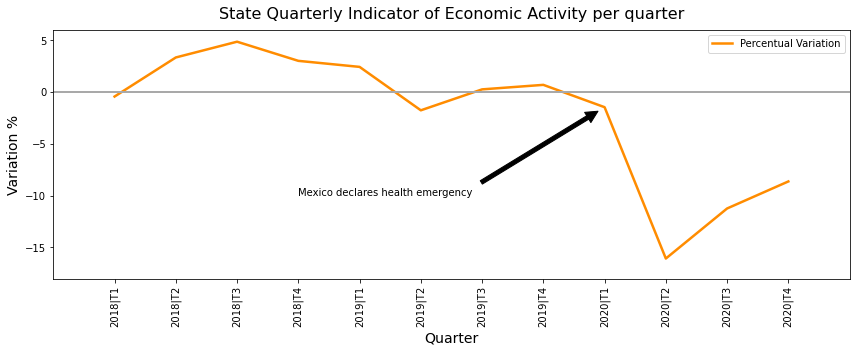

In [25]:
# ploting
tq_f= quarter_var_total.reset_index()
tq_t = tq_f['index']
tq_v = tq_f['Total Percentual Variation']
percentual_variation, = plt.plot(tq_t, tq_v,color="darkorange",linewidth= 2.5, linestyle= "-", label="Percentual Variation")
tick_locations = [value for value in tq_t]
plt.xticks(tick_locations, tq_t, rotation="vertical")
plt.legend(loc="best")
plt.title("State Quarterly Indicator of Economic Activity per quarter", fontsize=16, y=1.02)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Variation %", fontsize=14) 
plt.xlim(-1,12)
plt.ylim(-18,6)
plt.annotate(f'Mexico declares health emergency',fontsize=10,color="black",xy=(8, -1.464246),xytext=(3,-10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.axhline(y=0, color='darkgray', linestyle='-',linewidth=2)
plt.rcParams["figure.figsize"] = (12,5)
plt.tight_layout()
plt.savefig("Images/itaee_quarter.png")
plt.show()

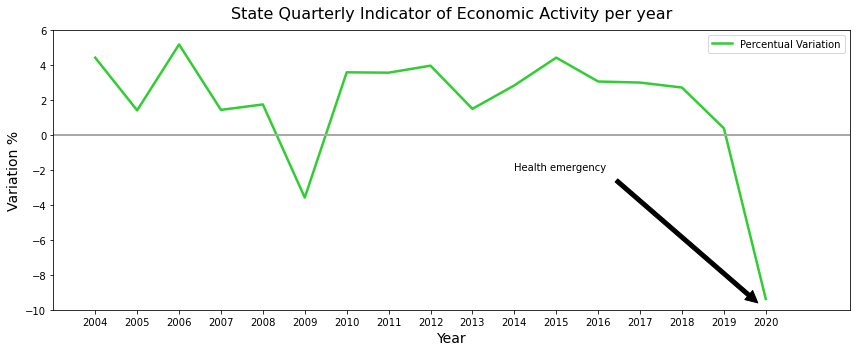

In [29]:
# ploting
tq_fn = annual_var_total.reset_index()
tq_fn
tq_tn = tq_fn['index']
tq_vn = tq_fn['Total Percentual Variation']
percentual_variation_n, = plt.plot(tq_tn, tq_vn,color='limegreen',linewidth= 2.5, linestyle= "-", label="Percentual Variation")
plt.legend(loc="best")
plt.title("State Quarterly Indicator of Economic Activity per year", fontsize=16, y=1.02)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,18)
plt.ylim(-10,6)
plt.annotate(f'Health emergency',fontsize=10,color="black",xy=(16, -10),xytext=(10,-2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(y=0, color='darkgray', linestyle='-',linewidth=2)
plt.rcParams["figure.figsize"] = (12,5)
plt.tight_layout()
plt.savefig("Images/itaee_year.png")
plt.show()

**Economic activities**

In [15]:
#Extract only row that cointains the principal economic activities
var_act = variation_percentage.loc[(variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades primarias')|
                                (variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades secundarias')|
                                (variation_percentage['Descriptores'] == 'Variación porcentual anual|Actividades terciarias')]              

**"Variación porcentual" per quarter**

In [16]:
#Extract only trimestral columns
trim_var_act = var_act.loc[:, ['Descriptores','2018|T1','2018|T2', '2018|T3', '2018|T4', 
                                   '2019|T1', '2019|T2', '2019|T3', '2019|T4',
                                   '2020|T1', '2020|T2', '2020|T3', '2020|T4']]

trim_var_act.set_index('Descriptores')
trim_var_act = trim_var_act.set_index('Descriptores')
quarter_var_act = trim_var_act.T
quarter_var_act.rename(columns={'Variación porcentual anual|Actividades primarias':'Primary sector',
                               'Variación porcentual anual|Actividades secundarias':'Secondary sector',
                               'Variación porcentual anual|Actividades terciarias':'Tertiary sector'},inplace=True)
quarter_var_act

Descriptores,Primary sector,Secondary sector,Tertiary sector
2018|T1,-15.149552,-1.246970,-0.338849
2018|T2,2.494940,3.425199,3.324551
2018|T3,5.358284,-1.514418,5.572524
2018|T4,22.247379,-0.319337,3.348855
2019|T1,8.616680,-3.722237,3.121610
2019|T2,2.580570,-7.942310,-1.098796
2019|T3,2.881603,-0.058098,0.286893
2019|T4,1.209359,2.645239,0.492369
2020|T1,2.732188,-1.274871,-1.485571
2020|T2,2.275188,-27.346503,-14.939264


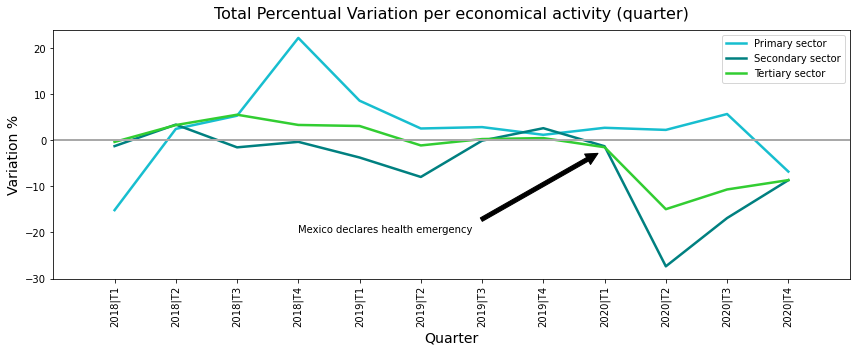

In [27]:
# ploting
act_df= quarter_var_act.reset_index()
x = act_df['index']
y1 = act_df['Primary sector']
y2 = act_df['Secondary sector']
y3 = act_df['Tertiary sector']

primary_sector, = plt.plot(x,y1,color="tab:cyan",linewidth= 2.5, linestyle= "-", label="Primary sector")
secondary_sector, = plt.plot(x,y2,color="teal",linewidth= 2.5, linestyle= "-", label="Secondary sector")
tertiary_sector, = plt.plot(x,y3,color="limegreen",linewidth= 2.5, linestyle= "-", label="Tertiary sector")

tick_locations = [value for value in x]
plt.xticks(tick_locations, x, rotation="vertical")
plt.legend(loc="best")
plt.title("Total Percentual Variation per economical activity (quarter)", fontsize=16, y=1.02)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,12)
plt.ylim(-30,24)
plt.annotate(f'Mexico declares health emergency',fontsize=10,color="black",xy=(8, -2),xytext=(3,-20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(y=0, color='darkgray', linestyle='-',linewidth=2)
plt.rcParams["figure.figsize"] = (12,5)
plt.tight_layout()
plt.savefig("Images/itaee_activity_quarter.png")
plt.show()


**"Variación porcentual" per year**

In [18]:
#Extract only anual columns
annual_var_act = var_act.loc[:, ['Descriptores','2004', '2005', '2006', '2007', '2008','2009','2010', '2011', '2012', '2013',
                                 '2014', '2015', '2016', '2017', '2018','2019','2020']]
annual_var_act.head()
annual_var_act.set_index('Descriptores')
annual_var_act = annual_var_act.set_index('Descriptores')
annual_var_act = annual_var_act.T
annual_var_act.rename(columns={'Variación porcentual anual|Actividades primarias':'Primary sector',
                               'Variación porcentual anual|Actividades secundarias':'Secondary sector',
                               'Variación porcentual anual|Actividades terciarias':'Tertiary sector'},inplace=True)
annual_var_act

Descriptores,Primary sector,Secondary sector,Tertiary sector
2004,-9.888921,3.405776,4.576236
2005,9.994033,0.671621,1.504510
2006,-12.594374,9.920377,4.450666
2007,-1.380552,-3.113033,2.158059
2008,-5.762934,-3.793245,2.586081
2009,7.672738,-3.049585,-3.669444
2010,-1.256062,-4.769261,4.778233
2011,5.548481,4.866302,3.377711
2012,-1.857885,3.197919,4.055447
2013,-10.923923,-5.381180,2.398331


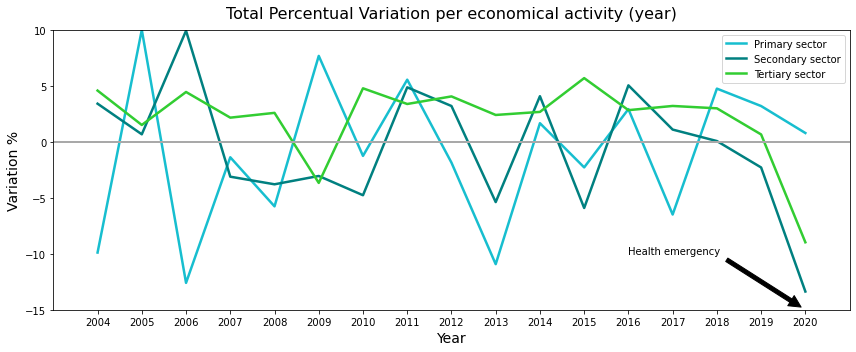

In [28]:
# ploting
act_dfn = annual_var_act.reset_index()
xn = act_dfn['index']
y1n = act_dfn['Primary sector']
y2n = act_dfn['Secondary sector']
y3n = act_dfn['Tertiary sector']

primary_sector, = plt.plot(xn,y1n,color="tab:cyan",linewidth= 2.5, linestyle= "-", label="Primary sector")
secondary_sector, = plt.plot(xn,y2n,color="teal",linewidth= 2.5, linestyle= "-", label="Secondary sector")
tertiary_sector, = plt.plot(xn,y3n,color="limegreen",linewidth= 2.5, linestyle= "-", label="Tertiary sector")

plt.legend(loc="best")
plt.title("Total Percentual Variation per economical activity (year)", fontsize=16, y=1.02)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Variation %", fontsize=14)
plt.xlim(-1,17)
plt.ylim(-15,10)
plt.annotate(f'Health emergency',fontsize=10,color="black",xy=(16, -15),xytext=(12,-10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(y=0, color='darkgray', linestyle='-',linewidth=2)
plt.rcParams["figure.figsize"] = (12,5)
plt.tight_layout()
plt.savefig("Images/itaee_activity_year.png")
plt.show()

*As part of this introduction, to determine when to limit economic activity in the capital, the Mexican government set up a system that takes into account 10 measures of hospitalizations, infections and deaths.*

*The levels of risk were labeled according to the colors of Mexican traffic lights: green meant the numbers were low, orange denoted a higher risk and a few restrictions, and red signaled a widespread outbreak that called for a shutdown of all nonessential businesses.*

*The calculation assigns a certain number of points to each indicator, depending on its severity. When the sum of all points total more than 31, the state, or the capital city, gets a red light — and that prompts a lockdown.*